<a href="https://colab.research.google.com/github/hetvigudka28/ImageColourization/blob/master/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.layers import Conv2D, UpSampling2D, Input
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from skimage.color import rgb2lab, lab2rgb
from skimage.transform import resize
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import img_to_array, load_img
import scipy
from PIL import Image as im
import matplotlib.pyplot as plt


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
path = '/content/drive/MyDrive/MP-Sem6/data'
train = train_datagen.flow_from_directory(path, target_size=(256,256), batch_size=340, class_mode=None)

Found 5000 images belonging to 1 classes.


In [ ]:
X=[]
Y=[]
for img in train[0]:
    try:
        lab = rgb2lab(img)
        X.append(lab[:,:,0])
        Y.append(lab[:,:,1:]/128)
        
    except:
        print('error')
X = np.array(X)
Y = np.array(Y)
X = X.reshape(X.shape+(1,))
print(X.shape)
print(Y.shape)

(340, 256, 256, 1)
(340, 256, 256, 2)


In [ ]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2, input_shape=(256, 256, 1)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))

In [ ]:
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(Conv2D(16, (3,3), activation='relu', padding='same'))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model.add(UpSampling2D((2, 2)))
model.compile(optimizer='adam', loss='mse' , metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      640       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       147584    
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 256)       295168    
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 256)       590080    
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 512)       1180160   
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 512)       2

In [ ]:
model.fit(X,Y,validation_split=0.1, epochs=300, batch_size=16)

Epoch 1/300
20/20 [==============================] - 21s 274ms/step - loss: 0.1540 - accuracy: 0.4476 - val_loss: 0.0203 - val_accuracy: 0.3754
Epoch 2/300
20/20 [==============================] - 3s 146ms/step - loss: 0.0142 - accuracy: 0.4405 - val_loss: 0.0188 - val_accuracy: 0.6262
Epoch 3/300
20/20 [==============================] - 3s 143ms/step - loss: 0.0138 - accuracy: 0.6527 - val_loss: 0.0187 - val_accuracy: 0.6277
Epoch 4/300
20/20 [==============================] - 3s 142ms/step - loss: 0.0136 - accuracy: 0.6536 - val_loss: 0.0187 - val_accuracy: 0.6275
Epoch 5/300
20/20 [==============================] - 3s 143ms/step - loss: 0.0136 - accuracy: 0.6537 - val_loss: 0.0188 - val_accuracy: 0.6275
Epoch 6/300
20/20 [==============================] - 3s 147ms/step - loss: 0.0135 - accuracy: 0.6543 - val_loss: 0.0185 - val_accuracy: 0.6275
Epoch 7/300
20/20 [==============================] - 3s 147ms/step - loss: 0.0135 - accuracy: 0.6543 - val_loss: 0.0183 - val_accuracy: 0.627

In [7]:
model.save('/content/drive/MyDrive/MP-Sem6/new_files/colorize_autoencoder300.model')

NameError: name 'model' is not defined

In [10]:
m = tf.keras.models.load_model(
    'new_files\colorize_autoencoder300.model',
    custom_objects=None,
    compile=True)

TypeError: __init__() takes from 2 to 4 positional arguments but 5 were given

In [ ]:
img1_color=[]
img1=img_to_array(load_img('image5031.jpg'))
img1 = resize(img1 ,(256,256))
img1_color.append(img1)


In [ ]:
img1_color = np.array(img1_color, dtype=float)
img1_color = rgb2lab(1.0/255*img1_color)[:,:,:,0]
img1_color = img1_color.reshape(img1_color.shape+(1,))
output1 = m.predict(img1_color)
output1 = output1*128

1/1 [==============================] - 1s 695ms/step


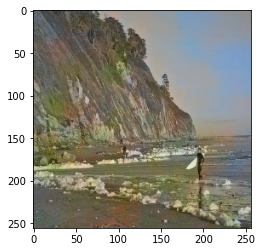

In [ ]:
result = np.zeros((256, 256, 3))
result[:,:,0] = img1_color[0][:,:,0]
result[:,:,1:] = output1[0]
plt.imshow(lab2rgb(result))

In [ ]:
!pip install Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
